# Introducción a Pandas

[Pandas](https://pandas.pydata.org/about/index.html) es una librería que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar. 
* La estructura de datos principal es el DataFrame, que puede considerarse como una tabla 2D en memoria (como una hoja de cálculo, con nombres de columna y etiquetas de fila). 
* Muchas funciones disponibles en Excel están disponibles mediante programación, como crear tablas dinámicas, calcular columnas basadas en otras columnas, trazar gráficos, etc.
* Proporciona un alto rendimiento para manipular (unir, dividir, modificar…) grandes conjuntos de datos

## Import

In [ ]:
!pip install pandas

In [1]:
import pandas as pd

C:\Users\imayc\AppData\Local\Temp\ipykernel_15908\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Estructuras de datos en Pandas

La librería Pandas, de manera genérica, contiene las siguientes estructuras de datos:
* **Series**: Array de una dimensión
* **DataFrame**: Se corresponde con una tabla de 2 dimensiones
* **Panel**: Similar a un diccionario de DataFrames

## Creación del objeto Series

In [4]:
#Creacion de un objeto Series
se=pd.Series([2,4,6,8,10])
print(se)

0     2
1     4
2     6
3     8
4    10
dtype: int64


In [2]:
#Creacion de una objeto serie de un diccionario de datos 
dalt={"Francis":176,"Moises":164, "Janet":155, "Dana":155}
salt=pd.Series(dalt)
print(salt)

Francis    176
Moises     164
Janet      155
Dana       155
dtype: int64


In [6]:
# Creación de un objeto Series inicializándolo con algunos 
# de los elementos de un diccionario de Python
saltm=pd.Series(dalt, index=["Janet",'Dana'])
print(saltm)

Janet    155
Dana     155
dtype: int64


In [7]:
# Creación de un objeto Series inicializandolo con un escalar
sesc=pd.Series(34,["t1",'t2',"t3"])
print(sesc)

t1    34
t2    34
t3    34
dtype: int64


## Acceso a los elementos de un objeto Series

Cada elemento en un objeto Series tiene un identificador único que se denomina **_index label_**.

In [3]:
# Creación de un objeto Series
se=pd.Series([2, 4, 6, 8],index=['da1', "da2", 'da3',"da4"])
print(se)

da1    2
da2    4
da3    6
da4    8
dtype: int64


In [4]:
# Accediendo al tercer elemento del objeto
se['da3']

6

In [5]:
# Tambien se puede acceder al elemento por posición
se[2]

C:\Users\imayc\AppData\Local\Temp\ipykernel_15908\3261691490.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se[2]


6

In [7]:
# loc es la forma estándar de acceder a un elemento de un objeto Series por atributo
se.loc["da3"]

6

In [9]:
# iloc es la forma estándar de acceder a un elemento de un objeto Series por posición
se.iloc[2]

6

In [10]:
# Accediendo al segundo y tercer elemento por posición
se.iloc[1:3]

da2    4
da3    6
dtype: int64

## Operaciones aritméticas con Series

In [11]:
# Creacion de un objeto Series
se2=pd.Series([2, 4, 6, 8])
print(se2)

0    2
1    4
2    6
3    8
dtype: int64


In [12]:
# Los objeto Series son similares y compatibles con los Arrays de Numpy
import numpy as np
#Usar una funcion de numoy oara sumar los elementos de la serie
np.sum(se2)

20

In [14]:
# El resto de operaciones aritméticas de Numpy sobre Arrays también son posibles
# Más información al respecto en la Introducción a Numpy
se2*2

0     4
1     8
2    12
3    16
dtype: int64

## Representación gráfica de un objeto Series

In [15]:
# Creación de un objeto Series denominado Temperaturas
temp=[4.4,5.1,6.1,6.2,6.1,5.7,5.2,4.7,4.1,3.9]
se3=pd.Series(temp,name="Temperaturas")
print(se3)

0    4.4
1    5.1
2    6.1
3    6.2
4    6.1
5    5.7
6    5.2
7    4.7
8    4.1
9    3.9
Name: Temperaturas, dtype: float64


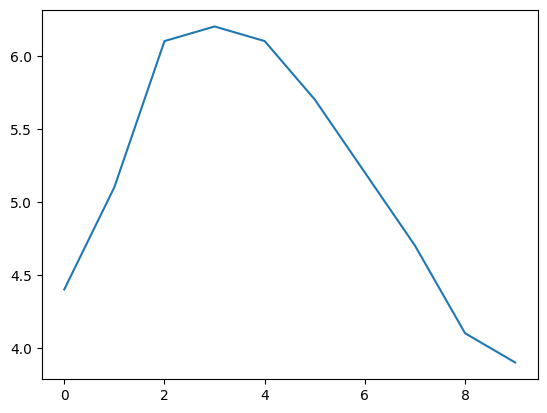

In [19]:
# Representación gráfica del objeto Series
%matplotlib inline
import matplotlib.pyplot as plt
se3.plot()
plt.show()

## Creación de un objeto DataFrame

In [22]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas={
    "peso":pd.Series([84,90,56,64],["Santiago", 'Pedro', "Ana","Julia"]),
    "altura":pd.Series({"Pedro":178,'Santiago':187,"Julia":170,'Ana':165}),
    'hijos':pd.Series([2,3],["Pedro",'Julia'])
}

print(personas)
df=pd.DataFrame(personas)
print(df)

{'peso': Santiago    84
Pedro       90
Ana         56
Julia       64
dtype: int64, 'altura': Pedro       178
Santiago    187
Julia       170
Ana         165
dtype: int64, 'hijos': Pedro    2
Julia    3
dtype: int64}
          peso  altura  hijos
Ana         56     165    NaN
Julia       64     170    3.0
Pedro       90     178    2.0
Santiago    84     187    NaN


Puede forzarse al DataFrame a que presente unas columnas determinadas y en un orden determinado

In [23]:
# Creación de un DataFrame inicializándolo con algunos elementos de un diccionario
# de objetos Series
df2=pd.DataFrame(personas,columns=['altura',"peso"],index=['Ana',"Julia",'Santiago'])
print(df2)

          altura  peso
Ana          165    56
Julia        170    64
Santiago     187    84


In [25]:
# Creación de un DataFrame inicializándolo con una lista de listas de Python
# Importante: Deben especificarse las columnas e indices por separado
datas=[
[185,4,76],
[170,0,65],
[190,1,89]
]

df3=pd.DataFrame(datas,
                columns=['Altura','Hijos','Peso'],
                index=['Pedro','Ana','Juan'])
print(df3)

       Altura  Hijos  Peso
Pedro     185      4    76
Ana       170      0    65
Juan      190      1    89


In [27]:
# Creación de un DataFrame inicializándolo con un diccionario de Python
personas2={
    "peso":{"Santiago":83, 'Pedro':80, "Ana":56,"Julia":64},
    "altura":{"Pedro":178,'Santiago':187,"Julia":170,'Ana':165}
}

print(personas2)
df4=pd.DataFrame(personas2)
print(df4)

{'peso': {'Santiago': 83, 'Pedro': 80, 'Ana': 56, 'Julia': 64}, 'altura': {'Pedro': 178, 'Santiago': 187, 'Julia': 170, 'Ana': 165}}
          peso  altura
Santiago    83     187
Pedro       80     178
Ana         56     165
Julia       64     170


## Acceso a los elementos de un DataFrame

In [28]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas={
    "peso":pd.Series([84,90,56,64],["Santiago", 'Pedro', "Ana","Julia"]),
    "altura":pd.Series({"Pedro":178,'Santiago':187,"Julia":170,'Ana':165}),
    'hijos':pd.Series([2,3],["Pedro",'Julia'])
}

df5=pd.DataFrame(personas)


### Acceso a los elementos de las columnas del DataFrame

In [29]:
df5['peso']

Ana         56
Julia       64
Pedro       90
Santiago    84
Name: peso, dtype: int64

In [32]:
df5[['peso','altura']]

,peso,altura
Ana,56,165
Julia,64,170
Pedro,90,178
Santiago,84,187


In [34]:
# Pueden combinarse los metodos anteriores con expresiones booleanas
df5[df5['peso']>80]

,peso,altura,hijos
Pedro,90,178,2.0
Santiago,84,187,NaN


In [35]:
# Pueden combinarse los metodos anteriores con expresiones booleanas
df5[(df5["peso"] > 80) & (df5["altura"]>180) ]

,peso,altura,hijos
Santiago,84,187,NaN


### Acceso a los elementos de las filas del DataFrame

In [36]:
# Mostrar el DataFrame
print(df5)

          peso  altura  hijos
Ana         56     165    NaN
Julia       64     170    3.0
Pedro       90     178    2.0
Santiago    84     187    NaN


In [39]:
print(df5.loc['Ana'])

peso       56.0
altura    165.0
hijos       NaN
Name: Ana, dtype: float64


In [40]:
print(df5.iloc[2])

peso       90.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64


In [42]:
print(df5.iloc[1:3])

       peso  altura  hijos
Julia    64     170    3.0
Pedro    90     178    2.0


### Consulta avanzada de los elementos de un DataFrame

In [ ]:
# Mostrar el DataFrame
df5

In [43]:
df5.query("altura >= 170 and peso > 60")

,peso,altura,hijos
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


## Copiar un DataFrame

In [57]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
df6=df5
df6.loc[0,2] =3.0
print(df5)
print(df6)

          peso  altura  hijos    2
Ana       56.0   165.0    NaN  NaN
Julia     64.0   170.0    3.0  NaN
Pedro     90.0   178.0    2.0  NaN
Santiago  84.0   187.0    NaN  NaN
0          NaN     NaN    NaN  3.0
          peso  altura  hijos    2
Ana       56.0   165.0    NaN  NaN
Julia     64.0   170.0    3.0  NaN
Pedro     90.0   178.0    2.0  NaN
Santiago  84.0   187.0    NaN  NaN
0          NaN     NaN    NaN  3.0


In [58]:
# Copia del DataFrame df en df_copy
# Importante: Al modificar un elemento de df_copy no se modifica df
dfCopia=df.copy()
dfCopia.loc[0,2] =3.0
print(df)
print(dfCopia)

          peso  altura  hijos
Ana         56     165    NaN
Julia       64     170    3.0
Pedro       90     178    2.0
Santiago    84     187    NaN
          peso  altura  hijos    2
Ana       56.0   165.0    NaN  NaN
Julia     64.0   170.0    3.0  NaN
Pedro     90.0   178.0    2.0  NaN
Santiago  84.0   187.0    NaN  NaN
0          NaN     NaN    NaN  3.0


## Modificación de un DataFrame

In [59]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
df6=pd.DataFrame(personas)
print(df6)

          peso  altura  hijos
Ana         56     165    NaN
Julia       64     170    3.0
Pedro       90     178    2.0
Santiago    84     187    NaN


In [60]:
# Añadir una nueva columna al DataFrame
df6["Cumple"]=[1990,1987,1980,1994]
print(df6)

          peso  altura  hijos  Cumple
Ana         56     165    NaN    1990
Julia       64     170    3.0    1987
Pedro       90     178    2.0    1980
Santiago    84     187    NaN    1994


In [61]:
# Añadir una nueva columna calculada al DataFrame
df6['Años']=2024 - df6['Cumple']
df6

,peso,altura,hijos,Cumple,Años
Ana,56,165,NaN,1990,34
Julia,64,170,3.0,1987,37
Pedro,90,178,2.0,1980,44
Santiago,84,187,NaN,1994,30


In [63]:
# Añadir una nueva columna creando un DataFrame nuevo
df6_modi=df6.assign(mascotas=[1,2,0,0])
print(df6_modi)
print(df6)

          peso  altura  hijos  Cumple  Años  mascotas
Ana         56     165    NaN    1990    34         1
Julia       64     170    3.0    1987    37         2
Pedro       90     178    2.0    1980    44         0
Santiago    84     187    NaN    1994    30         0
          peso  altura  hijos  Cumple  Años
Ana         56     165    NaN    1990    34
Julia       64     170    3.0    1987    37
Pedro       90     178    2.0    1980    44
Santiago    84     187    NaN    1994    30


In [64]:
# Eliminar una columna existente del DataFrame
del df6_modi['peso']
print(df6_modi)

          altura  hijos  Cumple  Años  mascotas
Ana          165    NaN    1990    34         1
Julia        170    3.0    1987    37         2
Pedro        178    2.0    1980    44         0
Santiago     187    NaN    1994    30         0


In [65]:
# Eliminar una columna existente devolviendo una copia del DataFrame resultante
df6_drop=df6.drop(["hijos"],axis=1)

In [66]:
df6_drop

,peso,altura,Cumple,Años
Ana,56,165,1990,34
Julia,64,170,1987,37
Pedro,90,178,1980,44
Santiago,84,187,1994,30


## Evaluación de expresiones sobre un DataFrame

In [67]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
df7=pd.DataFrame(personas)
df7

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [68]:
# Evaluar una función sobre una columna del DataFrame
df7.eval("altura/2")

Ana         82.5
Julia       85.0
Pedro       89.0
Santiago    93.5
Name: altura, dtype: float64

In [70]:
# Asignar el valor resultante como una nueva columna
df7.eval("altura_M = altura / 2",inplace=True)
print(df7)

          peso  altura  hijos  altura_M
Ana         56     165    NaN      82.5
Julia       64     170    3.0      85.0
Pedro       90     178    2.0      89.0
Santiago    84     187    NaN      93.5


In [71]:
# Evaluar una función utilizando una variable local
altu_maxima =180
df7.eval("altura > @altu_maxima")

Ana         False
Julia       False
Pedro       False
Santiago     True
Name: altura, dtype: bool

In [73]:
# Aplicar una función externa a una columna del DataFrame
def sumaPeso(x):
    return x + 2

df7['peso'].apply(sumaPeso)

Ana         58
Julia       66
Pedro       92
Santiago    86
Name: peso, dtype: int64

In [75]:
df7

,peso,altura,hijos,altura_M
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,90,178,2.0,89.0
Santiago,84,187,NaN,93.5


## Guardar y Cargar el DataFrame

In [76]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
df8=pd.DataFrame(personas)

In [79]:
# Guardar el DataFrame como CSV, HTML y JSON
df8.to_csv("df_personas.csv")
df8.to_html("df_personas.html")
df8.to_json("df_personas.json")

In [81]:
# Cargar el DataFrame en Jupyter
df9=pd.read_csv("df_personas.csv")

In [82]:
print(df9)

  Unnamed: 0  peso  altura  hijos
0        Ana    56     165    NaN
1      Julia    64     170    3.0
2      Pedro    90     178    2.0
3   Santiago    84     187    NaN


In [83]:
# Cargar el DataFrame con la primera columna correctamente asignada
df10=pd.read_csv("df_personas.csv",index_col=0)
df10

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN
